In [ ]:
import nltk
import warnings
warnings.filterwarnings('ignore')
nltk.download("movie_reviews")
from nltk.corpus import movie_reviews
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
negfeats = [movie_reviews.words(fileids=[f]) for f in negids]
posfeats = [movie_reviews.words(fileids=[f]) for f in posids]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# ***Неделя 1***

Создадим список всеъ отзывов и список классов:


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dict_feats = dict()
dict_feats['feats'], dict_feats['type'] = [],[]


for negfeat in negfeats:
  dict_feats['feats'].append(negfeat)
  dict_feats['type'].append(0)

for posfeat in posfeats:
  dict_feats['feats'].append(posfeat)
  dict_feats['type'].append(1)

Dataframe_feats = pd.DataFrame(data = dict_feats)
Dataframe_feats['feats'] = Dataframe_feats['feats'].apply(lambda x: ' '.join(x))
Dataframe_feats.head()

,feats,type
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard ' s quick movie review damn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' first...",0
4,synopsis : a mentally unstable man undergoing ...,0


In [ ]:
print('Количество отзывов в выборке = {}'.format(Dataframe_feats.shape[0]))

Количество отзывов в выборке = 2000


In [ ]:
print('Доля класса 1 в выборке = {}'.format(Dataframe_feats['type'].sum()/Dataframe_feats.shape[0]))

Доля класса 1 в выборке = 0.5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Dataframe_feats['feats'])
text = pd.DataFrame(X)
print('Количество признаков = {}'.format(len((vectorizer.get_feature_names()))))

Количество признаков = 39659


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
pipe = Pipeline([('CountVectorizer', CountVectorizer()), ('LogisticRegression', LogisticRegression())])
pipe.fit(Dataframe_feats['feats'], Dataframe_feats['type'])
print('accuracy_men = {}'.format(cross_val_score(pipe, Dataframe_feats['feats'], Dataframe_feats['type'], cv=3).mean()))

accuracy_men = 0.8370071720896308


In [ ]:
print('roc_auc_mean = {}'.format(cross_val_score(pipe, Dataframe_feats['feats'], Dataframe_feats['type'], cv=3 ,scoring='roc_auc').mean()))

roc_auc_mean = 0.9109983551730688


In [ ]:
from matplotlib import pyplot

logreg = LogisticRegression()
logreg.fit(X,Dataframe_feats['type'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ind1,ind2 = sorted([(ind,coef) for ind,coef in enumerate(logreg.coef_[0])], key = lambda x: abs(x[1]), reverse = True)[0:2]
print('Самые важные признаки для модели  - это {} и {}'.format(vectorizer.get_feature_names()[ind1[0]], vectorizer.get_feature_names()[ind2[0]]))

Самые важные признаки для модели  - это bad и unfortunately


# ***Неделя 2***

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
pipe1 = Pipeline([('CountVectorizer', CountVectorizer()), ('LogisticRegression', LogisticRegression())])
pipe2 = Pipeline([('TfidfVectorizer', TfidfVectorizer()), ('LogisticRegression', LogisticRegression())])
cvs1 = cross_val_score(pipe1, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
cvs2 = cross_val_score(pipe2, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
print('Pipe1: mean =  {}, std = {}'.format(cvs1.mean(), cvs1.std()))
print('Pipe2: mean =  {}, std = {}'.format(cvs2.mean(), cvs2.std()))

Pipe1: mean =  0.8424999999999999, std = 0.021794494717703363
Pipe2: mean =  0.8205, std = 0.003999999999999995


In [ ]:
pipe31 = Pipeline([('CountVectorizer', CountVectorizer(min_df=10)), ('LogisticRegression', LogisticRegression())])
pipe32 = Pipeline([('CountVectorizer', CountVectorizer(min_df=50)), ('LogisticRegression', LogisticRegression())])
cvs31 = cross_val_score(pipe31, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
cvs32 = cross_val_score(pipe32, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
print('Pipe31: mean =  {}, std = {}'.format(cvs31.mean(), cvs31.std()))
print('Pipe32: mean =  {}, std = {}'.format(cvs32.mean(), cvs32.std()))

Pipe31: mean =  0.8400000000000001, std = 0.01483239697419134
Pipe32: mean =  0.8140000000000001, std = 0.016552945357246857


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
pipe41 = Pipeline([('CountVectorizer', CountVectorizer()), ('LogisticRegression', LinearSVC())])
pipe42 = Pipeline([('CountVectorizer', CountVectorizer()), ('LogisticRegression',SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=5, shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=42, learning_rate='optimal', eta0=0.0, power_t=0.5, class_weight=None, warm_start=False, average=False))])
cvs41 = cross_val_score(pipe41, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
cvs42 = cross_val_score(pipe42, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
print('Pipe41: mean =  {}, std = {}'.format(cvs41.mean(), cvs41.std()))
print('Pipe42: mean =  {}, std = {}'.format(cvs42.mean(), cvs42.std()))

Pipe41: mean =  0.8325000000000001, std = 0.0162788205960997
Pipe42: mean =  0.7835, std = 0.05183145762951298


In [ ]:
nltk.download('stopwords')
stop_word = nltk.corpus.stopwords.words('english')
pipe51 = Pipeline([('CountVectorizer', CountVectorizer(stop_words = stop_word )), ('LogisticRegression', LogisticRegression())])
pipe52 = Pipeline([('CountVectorizer', CountVectorizer(stop_words = 'english')), ('LogisticRegression',LogisticRegression())])
cvs51 = cross_val_score(pipe51, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
cvs52 = cross_val_score(pipe52, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
print('Pipe51: mean =  {}, std = {}'.format(cvs51.mean(), cvs51.std()))
print('Pipe52: mean =  {}, std = {}'.format(cvs52.mean(), cvs52.std()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Pipe51: mean =  0.8400000000000001, std = 0.01129158979063624
Pipe52: mean =  0.8365, std = 0.013472193585307468


In [ ]:
pipe61 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range = (1,2))), ('LogisticRegression', LogisticRegression())])
pipe62 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range = (3,5), analyzer='char_wb')), ('LogisticRegression',LogisticRegression())])
cvs61 = cross_val_score(pipe61, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
cvs62 = cross_val_score(pipe62, Dataframe_feats['feats'], Dataframe_feats['type'], cv = 5)
print('Pipe61: mean =  {}, std = {}'.format(cvs61.mean(), cvs61.std()))
print('Pipe62: mean =  {}, std = {}'.format(cvs62.mean(), cvs62.std()))

Pipe51: mean =  0.8554999999999999, std = 0.02215851980616036
Pipe52: mean =  0.826, std = 0.007516648189186443
Pipe51: mean =  0.8554999999999999, std = 0.02215851980616036
Pipe52: mean =  0.826, std = 0.007516648189186443


# ***Неделя 3***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.utils import shuffle
import spacy
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('/content/products_sentiment_train.tsv', sep='\t', names = ['text', 'y'])
data.head()

Видим, что пропусков нет

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   y       2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Посмотрим на распределение классов:

Доля класса 1 в выборке = 0.637, а класса 2 = 0.363


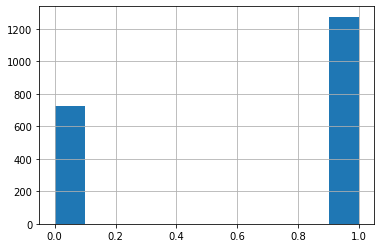

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data_train['y'].hist()
print('Доля класса 1 в выборке = {}, а класса 2 = {}'.format(data_train['y'].sum()/data_train['y'].shape[0], 1 - data_train['y'].sum()/data_train['y'].shape[0]))

Видим, что класса 1 чуть меньше чем в два раза больше класса 0

Начнем преобразовывать текст:

In [ ]:
def preprocess_text(series_column, stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    ''' Simple text preprocessing
        
    Parameters:
        series_column - pandas.series
        stop_words - list of stop words
        allowed_postags - what types of words must be kept after lemmatization
        
    Return:
        preprocessed series
    '''
    series_column = series_column.str.lower()
    #series_column = series_column.replace(r'[^a-z]', ' ', regex = True)
    
    for i, text in series_column.iteritems():
        
        #drop emails
        text = re.sub('\S*@\S*\s?', '', text)
        # Remove distracting single quotes
        text = re.sub("\'", "", text)
        #keep only letters
        text = re.sub('[^a-z]', ' ', text)
        
        #drop whitespaces
        text = ' '.join(text.split())
        
        #normalization and drop stop words and too short ones
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.pos_ in allowed_postags
                                                   and token.lemma_ not in stop_words
                                                   and len(token.lemma_) > 2]
        
        #old approach but faster than spacy
        #tokens = mystem.lemmatize(text)
        #tokens = [token for token in tokens if token not in [' ', '\n'] 
        #                                      and token not in stop_words
        #                                      and len(token) > 2]
        
        text = ' '.join(tokens)
        series_column[i] = text
    
    return series_column

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')

In [ ]:
data_train['text'] = preprocess_text(data_train['text'], stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
def transform_text(df, name):
    
    vectorizer = CountVectorizer(ngram_range=(1,3), max_df=0.8, 
                                 stop_words = 'english')
    pipe = Pipeline([('count', vectorizer), ('tfid', TfidfTransformer(smooth_idf=True,use_idf=True))])
    
    matrix = pipe.fit_transform(df[name])
    m = matrix.toarray()
    text = pd.DataFrame(m)
    df.drop(name, axis = 1, inplace = True) 
    df = df.reset_index(drop=True)
    text.columns = [name + f'{i}' for i in range(text.shape[1])]
    df = pd.concat([df, text], axis=1)
    return df

In [ ]:
data_train = transform_text(data_train, 'text')

In [ ]:
from sklearn.linear_model import SGDClassifier
X = data_train.drop('y',axis = 1)
y = data_train['y']
for model in [LogisticRegression(), LinearSVC(), SGDClassifier()]:
  print(cross_val_score(model, X, y, n_jobs=4).mean())

0.6575
0.7315
0.7235000000000001


Попробуем без преобразования текста подобрать модель

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from itertools import product
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE


In [ ]:
data_train = pd.read_csv('/content/sample_data/products_sentiment_train.tsv', sep='\t', names = ['text', 'y'])

In [ ]:
X, y = data_train['text'], data_train['y']

In [ ]:

def text_classifier(vectorizer, transformer, classifier):
    return Pipeline(
            [("vectorizer", vectorizer),
            ("transformer", transformer),
            ("classifier", classifier)]
        ) 
mx = 0
for vect, clf, transformer in product([CountVectorizer,TfidfVectorizer], [LogisticRegression, LinearSVC, SGDClassifier],[TruncatedSVD, TfidfTransformer]):
  curr = cross_val_score(text_classifier(vect(), transformer(), clf(max_iter=1000)), X, y, n_jobs=8).mean()
  if (curr > mx):
    mx = curr
    max_string = str(vect) +" - "+str(clf) + " - "+str(transformer)
print('Лучшее качество равно = {}'.format(mx))
print(max_string)

Лучшее качество равно = 0.7689999999999999
<class 'sklearn.feature_extraction.text.CountVectorizer'> - <class 'sklearn.svm._classes.LinearSVC'> - <class 'sklearn.feature_extraction.text.TfidfTransformer'>


Видим, что в данном случае выиграла комбинация CountVectorizer, LinearSVC, TfidfTransformer

In [ ]:

clf_pipeline = Pipeline(
            [("vectorizer", CountVectorizer(ngram_range=(1,3),max_df=0.8)), 
            ("transformer", TfidfTransformer(smooth_idf=True,use_idf=True)),
            ("classifier", LinearSVC())])

X, y = data_train['text'], data_train['y']
print('Качество у лучшей модели = {}'.format(cross_val_score(clf_pipeline, X, y, n_jobs=4).mean()))

Качество у лучшей модели = 0.79


Теперь попробуем сбалансировать классы при помощи разны алгоритмов oversampling:

In [ ]:
from imblearn.pipeline import Pipeline

clf_pipeline = Pipeline(
            [("vectorizer", CountVectorizer(ngram_range=(1,3),max_df=0.8)), 
            ("transformer", TfidfTransformer(smooth_idf=True,use_idf=True)),
            ('over', SMOTE(random_state = 42)),
            ("classifier", LinearSVC(max_iter=400, loss='hinge', C=1.9, tol=0.001, random_state=777))])

X, y = data_train['text'], data_train['y']
print('Качество у лучшей модели = {}'.format(cross_val_score(clf_pipeline, X, y, n_jobs=4,cv = 5).mean()))

Качество у лучшей модели = 0.792


In [ ]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_pipeline.fit(X_train, y_train)

y_pred = clf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.67      0.68       135
           1       0.83      0.85      0.84       265

    accuracy                           0.79       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.78      0.79      0.78       400



In [ ]:
clf_pipeline.fit(X, y)
data_test = pd.read_csv('/content/products_sentiment_test.tsv', sep='\t')
data_test['y'] = clf_pipeline.predict(data_test.text)

# Save solution for Kaggle

data_test.head()
data_test[['Id','y']].to_csv('sample_sabmission.csv', index = False)

Картинка

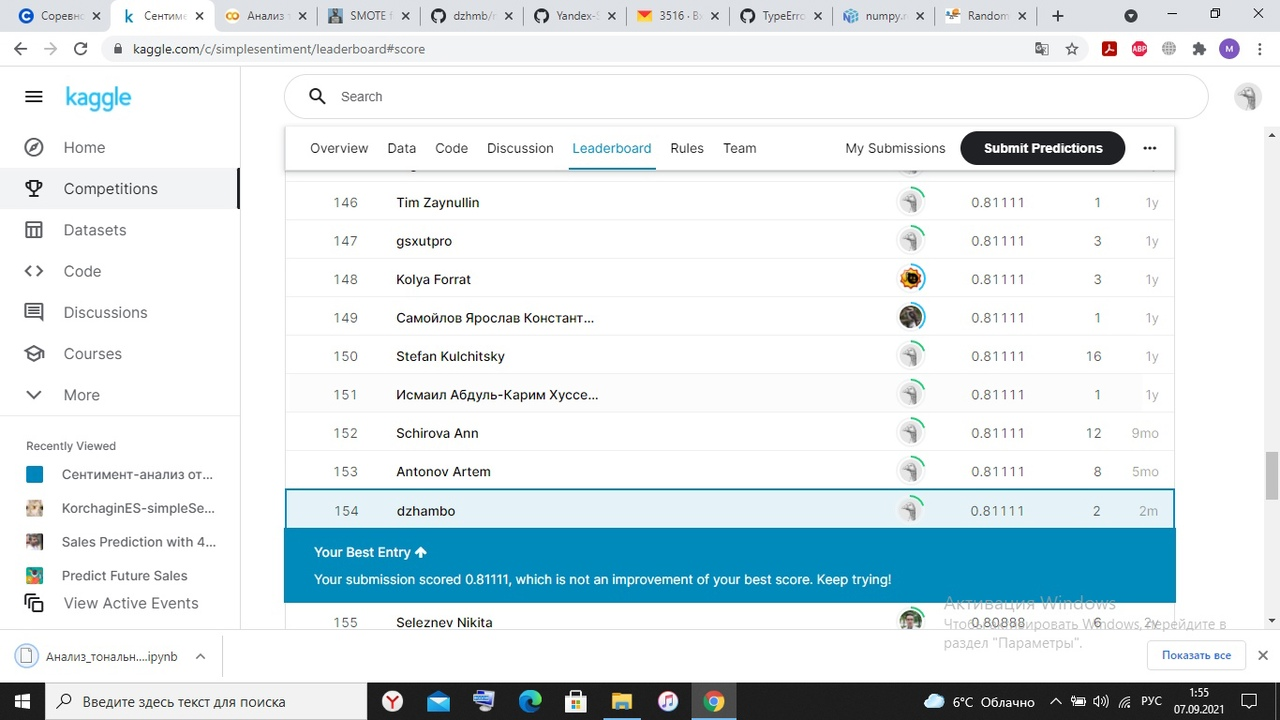

In [ ]:
from IPython.display import Image
Image("/content/ZdUDPrPBYRo.jpg")

# ***Неделя 4***

**Подгружаем библиотеки**

In [ ]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from nltk.corpus import movie_reviews

**Достаем данные**

In [ ]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

negfeats = [' '.join(movie_reviews.words(fileids=[f])) for f in negids]
posfeats = [' '.join(movie_reviews.words(fileids=[f])) for f in posids]

texts = negfeats + posfeats
labels = [0] * len(negfeats) + [1] * len(posfeats)

**Разбираемся с моделью**

In [ ]:
def make_pipeline(vectorizer, transformer, classifier):
    return Pipeline([
            ('vectorizer', vectorizer),
            ('transformer', transformer),
            ('classifier', classifier)
        ])
    

def make_classifier(text, label):
    svc = make_pipeline(CountVectorizer(min_df=1, ngram_range=(1, 5), max_df=0.9, stop_words=None),
                        TfidfTransformer(smooth_idf=True,use_idf=True),
                        LinearSVC(max_iter=500, loss='hinge', C=1.9, tol=0.001, random_state=777))
    svc.fit(text, label)
    return svc

In [ ]:
classifier = make_classifier(texts, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
accuracy_score(labels, classifier.predict(texts))

1.0

In [ ]:
with open('sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(classifier, f)

# ***Неделя 5***

**Достанем из сайта названия фильмов**

In [ ]:
import requests
from bs4 import BeautifulSoup
from multiprocessing import Pool
from functools import reduce

In [ ]:
URL = "https://www.metacritic.com/browse/movies/score/metascore/all/filtered/netflix"
html = requests.get(URL, headers={'User-Agent': 'Mozilla/5.0'}).content
soup = BeautifulSoup(html, 'html.parser')
num_pages = int(soup.find('li', class_='page last_page').find('a', class_='page_num').text)

In [ ]:
print('Количество страниц = {}'.format(num_pages))

Количество страниц = 9


In [ ]:
def get_films_list(url):
    html = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).content
    soup = BeautifulSoup(html, 'html.parser')
    titles = soup.find_all('a', class_='title')
    return [title.get_text().strip() for title in titles]

In [ ]:
with Pool(10) as p:
    url_list = [URL + "?page=" + str(page) for page in range(num_pages)]
    map_results = p.map(get_films_list, url_list)
    films_list = sorted(reduce(lambda x, y: x + y, map_results))

In [ ]:
 films_list[:10]

['13th',
 '1922',
 '2012',
 '22 July',
 '3 Days to Kill',
 '5 Flights Up',
 '50 First Dates',
 '6 Balloons',
 '6 Underground',
 'A Cinderella Story']

**Достанем из википедии колонки названий**

In [ ]:
import requests
from bs4 import BeautifulSoup
from multiprocessing import Pool
from functools import reduce

r = requests.get('https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff')
soup = BeautifulSoup(r.text)
titles = soup.find_all('span', class_ = 'toctext')
[title.get_text().strip() for title in titles]

['Motivation',
 'Bias–variance decomposition of mean squared error',
 'Derivation',
 'Approaches',
 'k-nearest neighbors',
 'Applications',
 'In regression',
 'In classification',
 'In reinforcement learning',
 'In human learning',
 'See also',
 'References']

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/Category:Machine_learning_algorithms')
soup = BeautifulSoup(r.text)
name_soup = soup.find('div', class_ = 'mw-category')
titles = name_soup.find_all('a')
name_of_articles = [title.get_text().strip() for title in titles]

In [ ]:
name_of_articles[:10]

['Adagrad',
 'Algorithms of Oppression',
 'Almeida–Pineda recurrent backpropagation',
 'Augmented Analytics',
 'Backpropagation',
 'Bioz',
 'Bootstrap aggregating',
 'CN2 algorithm',
 'Constructing skill trees',
 'Deep reinforcement learning']

# ***Неделя 6***

**Парсим сайты и получаем обучающую выборку**

In [480]:

import os
import json
import warnings
import re
import codecs
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from multiprocessing import Pool
from functools import reduce
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [481]:
def get_mob(num_pages = 1):
  mob_list = []
  url_main = 'https://otziv-otziv.ru/katalog/smartphones/'
  for i in range(1,num_pages+1):
    url = url_main+'?page=' + str(i)
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    mob_soup = soup.find('div',class_  = 'comments')
    mob_href = mob_soup.find_all('div', class_ = 'content')
    mob_list.extend([href.find('a').get('href') for href in mob_href])
  return mob_list

In [482]:
def get_reviews(param = 1):
    url_list = get_mob(param)
    for url in tqdm(url_list):
      try:
        while True:
              html = requests.get('https://otziv-otziv.ru/'+ url).text
              if html:
                  soup = BeautifulSoup(html, 'html.parser')
                  reviews = soup.find_all('div', class_ = 'container-reviews collapsible collapsed')
                  for review in reviews:
                      review_text = review.get_text()
                      review_rating = int(review.find('div', class_='stars-container')['title'][-1])
                      with open('train.json', 'a') as f:
                          f.truncate()
                          json.dump({'text': review_text, 'rating': review_rating}, f, ensure_ascii=False)
                          f.write('\n')
                  if len(reviews) > 0:
                        break
              else:
                  print("Не удалось загрузить страницу")
      except:
       print('Сетевая ошибка')

In [483]:
get_reviews(param = 50)

 82%|████████▏ | 860/1050 [15:19<03:01,  1.05it/s]

Сетевая ошибка


 82%|████████▏ | 866/1050 [15:24<02:22,  1.29it/s]

Сетевая ошибка


 83%|████████▎ | 869/1050 [15:27<02:50,  1.06it/s]

Сетевая ошибка


 92%|█████████▏| 971/1050 [17:14<01:22,  1.04s/it]

Сетевая ошибка


 97%|█████████▋| 1019/1050 [18:03<00:29,  1.04it/s]

Сетевая ошибка


100%|██████████| 1050/1050 [18:36<00:00,  1.06s/it]


**Выгружаем данные**

In [501]:
def extract_info(text, label):
  try:
      if label == 1:
        if 'Плюсы' in text:
          text = re.findall(r'Плюсы(:.*?)Минусы:', text)[0]
        else:
          text = find(r'Достоинства(:.*?)Недостатки:', text)[0]
      else:
        if 'Минусы' in text:
          text = text[text.find('Минусы')+7:]
        else:
          text = text[text.find('Недостатки')+11:]
      return text
  except:
    return text

In [485]:
with codecs.open('test.csv', 'r') as f:
    test_text = f.read()
    soup = BeautifulSoup(test_text, 'html.parser')
    test_reviews = soup.findAll('review')
    test_list = [test_review.text for test_review in test_reviews]

In [486]:
test = pd.DataFrame(test_list, columns=['text'])

In [487]:
test.head()

,text
0,"Ужасно слабый аккумулятор, это основной минус ..."
1,ценанадежность-неубиваемостьдолго держит батар...
2,"подробнее в комментариях\nК сожалению, факт по..."
3,я любительница громкой музыки. Тише телефона у...
4,"Дата выпуска - 2011 г, емкость - 1430 mAh, тех..."


In [488]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [489]:
train = pd.read_json('train.json', orient='records', lines=True)

In [490]:
train['label'] = train['rating'].apply(lambda x: int(x == 5))
train['length'] = train['text'].apply(lambda x: len(x))
train['text'] = train['text'].apply(lambda x: x.replace('\n',''))
train['text'] = train.apply(lambda x: extract_info(x['text'], x['label']), axis=1)

In [491]:
train.head()

,text,rating,label,length
0,батарея Пользую...,4,0,1235
1,"Логинов Юрий, 06.04.2019\r ...",5,1,884
2,"\rкупил 5S проработал 4 месяца, погас навсегд...",2,0,301
3,": К плюсам бы я отнес, это универсальность раз...",5,1,1002
4,Очень небольшое время работы. На морозе вообщ...,4,0,523


In [492]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31350 entries, 0 to 31349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    31350 non-null  object
 1   rating  31350 non-null  int64 
 2   label   31350 non-null  int64 
 3   length  31350 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 979.8+ KB


**Описательный анализ данных**

In [493]:
train.describe()

,rating,label,length
count,31350.000000,31350.000000,31350.000000
mean,4.083030,0.548931,773.581148
std,1.269775,0.497608,595.601395
min,1.000000,0.000000,61.000000
25%,4.000000,0.000000,387.000000
50%,5.000000,1.000000,603.000000
75%,5.000000,1.000000,946.000000
max,9.000000,1.000000,7730.000000


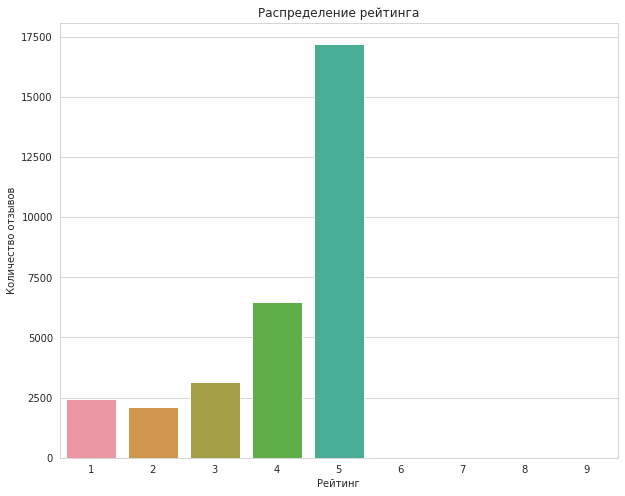

In [494]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x='rating', data=train);
plt.title("Распределение рейтинга");
plt.xlabel("Рейтинг");
plt.ylabel("Количество отзывов");

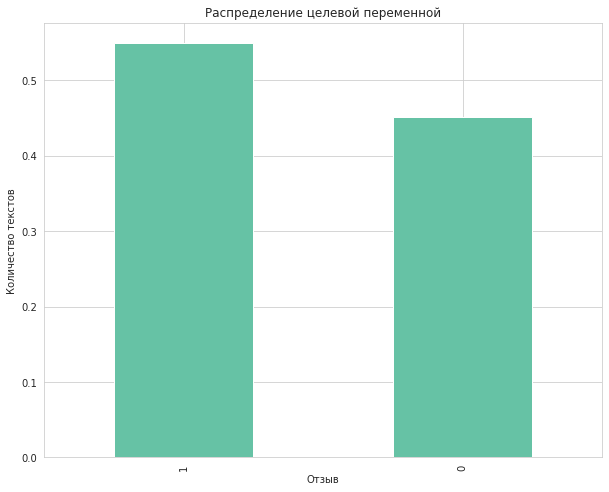

In [495]:
fig = plt.figure(figsize=(10, 8))
train['label'].value_counts(normalize=True).plot(kind='bar');
plt.title("Распределение целевой переменной");
plt.xlabel("Отзыв");
plt.ylabel("Количество текстов");

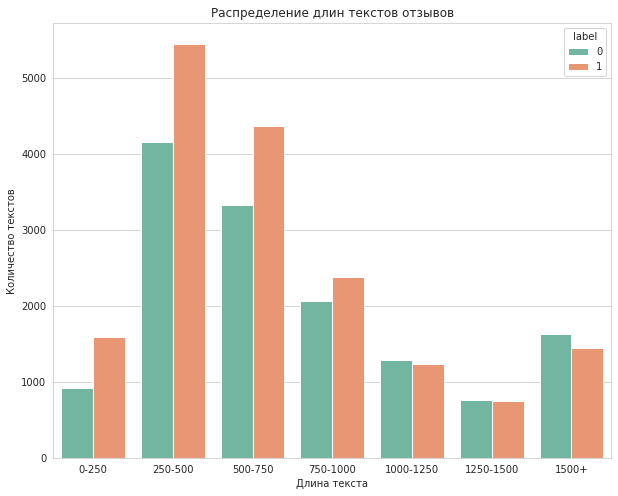

In [496]:
df = train.copy()
df['length'] = pd.cut(train['length'], bins=[0, 250, 500, 750, 1000, 1250, 1500, float('inf')], 
                      labels=['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500+'])

fig = plt.figure(figsize=(10, 8))
sns.countplot(x='length', hue='label', data=df);
plt.title("Распределение длин текстов отзывов");
plt.xlabel("Длина текста");
plt.ylabel("Количество текстов");

**Теперь перейдем к построении модели **

In [497]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [498]:
X = train['text'].values
y = train['label'].values


X_test = test['text'].values

stop_words = stopwords.words('russian')

In [499]:
def make_pipeline(vectorizer, transformer, classifier):
    return Pipeline([
            ('vectorizer', vectorizer),
            ('transformer', transformer),
            ('classifier', classifier)
        ])
    
def make_estimator(classifier, params_grid, scorer, data, labels):
  pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), classifier)
  grid_cv = RandomizedSearchCV(pipeline, params_grid, scoring=scorer, cv=5, 
                                 random_state=777, n_iter=100, verbose=1, n_jobs=-1)
  grid_cv.fit(data, labels)
  return grid_cv

**Baseline**

In [ ]:
score = cross_val_score(make_pipeline(CountVectorizer(), TfidfTransformer(), LinearSVC(random_state=777)), X, y, cv=5).mean()
print(f"LinearSVC - {score}")

**Начнем совершенствовать модель**

In [ ]:
params_grid_vectorizer = {
    'vectorizer__max_df': [0.85, 0.9, 0.95, 1.0],
    'vectorizer__min_df': [1, 10, 20],
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)],
    'vectorizer__stop_words': [stop_words, None]
}
params_grid_transformer = {
    'transformer__norm': ['l1', 'l2'],
    'transformer__smooth_idf': [True, False],
    'transformer__use_idf': [True, False],
    'transformer__sublinear_tf': [True, False]
}
params_grid_lsvc = {
    'classifier__loss': ['hinge', 'squared_hinge'],
    'classifier__max_iter': np.arange(200, 1000, 200),
    'classifier__tol': [1e-5, 1e-4, 1e-3],
    'classifier__C': [0.9, 1.0, 1.1, 1.2]
}

In [ ]:
%%time
grid_search_lsvc = make_estimator(LinearSVC(random_state=24), 
                                  {**params_grid_vectorizer, **params_grid_transformer, **params_grid_lsvc}, 'accuracy', X, y)
print("LinearSVC:")
print(f"Лучшее качество - {grid_search_lsvc.best_score_}")
print(f"Параметры - {grid_search_lsvc.best_params_}")

**Предсказание:**

In [ ]:
make_pipeline(CountVectorizer(), TfidfTransformer(), LinearSVC(random_state=777)).fit(X, y).predict(X_test)

In [ ]:
svc = grid_search_lsvc.best_estimator_
svc.steps

In [ ]:
pred = svc.predict(X_test)
pred

In [ ]:
with open('submission.csv', 'w') as f:
    f.write(pd.DataFrame(pd.Series(map(str, range(0, 100))).str \
                         .cat(map(str, pd.Series(pred).apply(lambda x: 'neg' if x == 0 else 'pos')), sep=','), 
                         columns=['Id,y']).to_csv(sep=' ', index=False))

In [503]:
import pickle
with open('sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(svc, f)